In [14]:
# Import scraping modules
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Import data manipulation and visualization packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import statistics

In [2]:
#The data we are going to import is the NFL passing data from the 2019 season,
#which can be found here. We open the site and pass it to BeautifulSoup with the following:

#url page

url = 'https://www.pro-football-reference.com/years/2020/passing.htm'

#open URL and pass to Beautiful Soup 

html = urlopen(url)

stats_page = BeautifulSoup(html)


In [3]:
#The two BeautifulSoup functions we will use to scrape the page are findAll() and getText()

#findAll(name)
#Parameters
#name -- HTML tags to use to parse webpage
#Returns array of all matches to name tag

#getText()
#Returns text from HTML


#Fetch table headers
column_head = stats_page.findAll('tr')[0]
column_head = [i.getText() for i in column_head.findAll('th')]

print(column_head)
# Fetch Rows, we skip the first row since these are column headers 

table_row = stats_page.findAll('tr')[1:]

qb_stats = []

for i in range(len(table_row)):
    qb_stats.append([col.getText() for col in table_row[i].findAll('td')])

#Let's print to examine the first row which should be the column headers.
print(qb_stats[0])

['Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'NY/A', 'ANY/A', 'Sk%', '4QC', 'GWD']
['Deshaun Watson*', 'HOU', '25', 'QB', '16', '16', '4-12-0', '382', '544', '70.2', '4823', '33', '6.1', '7', '1.3', '221', '77', '8.9', '9.5', '12.6', '301.4', '112.4', '70.5', '49', '293', '7.64', '8.22', '8.3', '', '']


In [4]:
#We have our column heads and our stats_page. Now we can use pandas library to make a dataframe

nfl_df = pd.DataFrame(qb_stats, columns = column_head[1:])

nfl_df.head()

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Y/G,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD
0,Deshaun Watson*,HOU,25,QB,16,16,4-12-0,382,544,70.2,...,301.4,112.4,70.5,49,293,7.64,8.22,8.3,,
1,Patrick Mahomes*,KAN,25,QB,15,15,14-1-0,390,588,66.3,...,316.0,108.2,82.9,22,147,7.53,8.33,3.6,3,3
2,Tom Brady,TAM,43,QB,16,16,11-5-0,401,610,65.7,...,289.6,102.2,72.5,21,143,7.12,7.53,3.3,3,3
3,Matt Ryan,ATL,35,QB,16,16,4-12-0,407,626,65.0,...,286.3,93.3,67.0,41,257,6.48,6.52,6.1,,
4,Josh Allen*,BUF,24,QB,16,16,13-3-0,396,572,69.2,...,284.0,107.2,81.7,26,159,7.33,7.82,4.3,2,3


In [5]:
nfl_df.isnull().sum()

Player    3
Tm        3
Age       3
Pos       3
G         3
GS        3
QBrec     3
Cmp       3
Att       3
Cmp%      3
Yds       3
TD        3
TD%       3
Int       3
Int%      3
1D        3
Lng       3
Y/A       3
AY/A      3
Y/C       3
Y/G       3
Rate      3
QBR       3
Sk        3
Yds       3
NY/A      3
ANY/A     3
Sk%       3
4QC       3
GWD       3
dtype: int64

In [6]:
#Looks like two Yards('Yds') columns: passing yards and yards sacked

nfl_df.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'NY/A', 'ANY/A', 'Sk%', '4QC',
       'GWD'],
      dtype='object')

In [7]:
#Change the latter 'yds' to 'Yds Sacked' to avoid confusion 
nfl_df_new = nfl_df.columns.values 

nfl_df_new[-6] = 'Yds_Sacked'
nfl_df_new[10] = 'Yds_Pass'
nfl_df.columns = nfl_df_new 

#New columns look good; no confusion between the two columns
nfl_df.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds_Pass', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A',
       'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds_Sacked', 'NY/A', 'ANY/A', 'Sk%',
       '4QC', 'GWD'],
      dtype='object')

In [61]:
# Select categories for visualization and analysis 

# Cmp% - completion rate 
# Yds_Pass - passing yards 
# TD - passing touchdowns 
# Int - interceptions 
# Y/A - yards per attempt
# Rate - passer rating 
# Player - Player name 
# Tm - Team name 

cats= ['Cmp%', 'Yds_Pass', 'TD', 'Int', 'Y/A', 'Rate']

final_df = nfl_df[['Player', 'Tm'] + cats]

final_df.head()

,Player,Tm,Cmp%,Yds_Pass,TD,Int,Y/A,Rate
0,Deshaun Watson*,HOU,70.2,4823,33,7,8.9,112.4
1,Patrick Mahomes*,KAN,66.3,4740,38,6,8.1,108.2
2,Tom Brady,TAM,65.7,4633,40,12,7.6,102.2
3,Matt Ryan,ATL,65.0,4581,26,11,7.3,93.3
4,Josh Allen*,BUF,69.2,4544,37,10,7.9,107.2


In [62]:
#Check the data types of final subset used for our analysis 

final_df.dtypes

Player      object
Tm          object
Cmp%        object
Yds_Pass    object
TD          object
Int         object
Y/A         object
Rate        object
dtype: object

In [63]:
#We must convert the appropriate data into numerical data since we are unable to manipulate objects 

for i in cats:
    final_df[i] = pd.to_numeric(nfl_df[i])
    
#Check to confirm - values have be converted to numerical 
final_df.dtypes

<ipython-input-63-f31334008c33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[i] = pd.to_numeric(nfl_df[i])


Player       object
Tm           object
Cmp%        float64
Yds_Pass    float64
TD          float64
Int         float64
Y/A         float64
Rate        float64
dtype: object

In [64]:
#Pro football reference had put characters next to players names with the following achievements: "* Selected to Pro Bowl, + First-Team All-Pro"
# Will use str.replace() to remove both * and +

final_df['Player'] = final_df['Player'].str.replace('*', '')

final_df['Player'] = final_df['Player'].str.replace('+', '')

final_df.head(10)

<ipython-input-64-49df50332210>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Player'] = final_df['Player'].str.replace('*', '')
<ipython-input-64-49df50332210>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Player'] = final_df['Player'].str.replace('+', '')


,Player,Tm,Cmp%,Yds_Pass,TD,Int,Y/A,Rate
0,Deshaun Watson,HOU,70.2,4823.0,33.0,7.0,8.9,112.4
1,Patrick Mahomes,KAN,66.3,4740.0,38.0,6.0,8.1,108.2
2,Tom Brady,TAM,65.7,4633.0,40.0,12.0,7.6,102.2
3,Matt Ryan,ATL,65.0,4581.0,26.0,11.0,7.3,93.3
4,Josh Allen,BUF,69.2,4544.0,37.0,10.0,7.9,107.2
5,Justin Herbert,LAC,66.6,4336.0,31.0,10.0,7.3,98.3
6,Aaron Rodgers,GNB,70.7,4299.0,48.0,5.0,8.2,121.5
7,Kirk Cousins,MIN,67.6,4265.0,35.0,13.0,8.3,105.0
8,Russell Wilson,SEA,68.8,4212.0,40.0,13.0,7.5,105.1
9,Philip Rivers,IND,68.0,4169.0,24.0,11.0,7.7,97.0


In [65]:
# we will use the mean as the cutoff or filter for our analysis: only QBs with > 1200 yds passed
final_df['Yds_Pass'].mean()

#Filter by >1200 passing yards

df_1200 = final_df[final_df['Yds_Pass'] > 1200]


In [66]:
#Create statistical rank by percentile; create cols with rank

for i in cats:
    df_1200[i + '_Rank'] = df_1200[i].rank(pct=True)
    
#Interception ranks need to switch since most interceptions should negatively affect rank 

df_1200['Int_Rank'] = 1 - df_1200['Int_Rank']

df_1200.head()

<ipython-input-66-a2de618c91a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1200[i + '_Rank'] = df_1200[i].rank(pct=True)
<ipython-input-66-a2de618c91a4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1200['Int_Rank'] = 1 - df_1200['Int_Rank']


,Player,Tm,Cmp%,Yds_Pass,TD,Int,Y/A,Rate,Cmp%_Rank,Yds_Pass_Rank,TD_Rank,Int_Rank,Y/A_Rank,Rate_Rank
0,Deshaun Watson,HOU,70.2,4823.0,33.0,7.0,8.9,112.4,0.944444,1.000000,0.805556,0.750000,1.000000,0.972222
1,Patrick Mahomes,KAN,66.3,4740.0,38.0,6.0,8.1,108.2,0.555556,0.972222,0.916667,0.819444,0.888889,0.944444
2,Tom Brady,TAM,65.7,4633.0,40.0,12.0,7.6,102.2,0.472222,0.944444,0.958333,0.166667,0.680556,0.777778
3,Matt Ryan,ATL,65.0,4581.0,26.0,11.0,7.3,93.3,0.361111,0.916667,0.638889,0.263889,0.513889,0.416667
4,Josh Allen,BUF,69.2,4544.0,37.0,10.0,7.9,107.2,0.916667,0.888889,0.888889,0.402778,0.833333,0.916667


# Generating Radar Charts

In [67]:
#Setting up general plot parameters

mpl.rcParams['font.family'] = 'Verdana'
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['xtick.major.pad'] = 15 

### Hex Codes of NFL Team colors 

HEX Codes of NFL Team colors --> https://teamcolorcodes.com/nfl-team-color-codes/

In [68]:
#Create a dictionary of each NFL team
team_colors = {'ARI':'#97233f', 'ATL':'#a71930', 'BAL':'#241773', 
               'BUF':'#00338d', 'CAR':'#0085ca', 'CHI':'#0b162a', 
               'CIN':'#fb4f14', 'CLE':'#311d00', 'DAL':'#041e42', 
               'DEN':'#002244', 'DET':'#0076b6', 'GNB':'#203731', 
               'HOU':'#03202f', 'IND':'#002c5f', 'JAX':'#006778', 
               'KAN':'#e31837', 'LAC':'#002a5e', 'LAR':'#003594', 
               'MIA':'#008e97', 'MIN':'#4f2683', 'NWE':'#002244', 
               'NOR':'#d3bc8d', 'NYG':'#0b2265', 'NYJ':'#125740', 
               'OAK':'#000000', 'PHI':'#004c54', 'PIT':'#ffb612', 
               'SFO':'#aa0000', 'SEA':'#002244', 'TAM':'#d50a0a', 
               'TEN':'#0c2340', 'WAS':'#773141'}

In [69]:
#Since we have 6 categories to plot on a radar chart, so we will need to plot every 60 degrees (360 for a full circle)

#Set up is where the labels will appear so it's not offset
setup = np.pi/6

angle = np.linspace(0, 2*np.pi, len(cats) + 1) + setup


In [70]:
# Function to create a radar chart 

def radar_chart(ax, angle, player_data, color='blue'):

    #Plot data and fill in colors 

    ax.plot(angle, np.append(player_data[-(len(angle)-1):],
                          player_data[-(len(angle)-1)]), color=color, linewidth=2)

    ax.fill(angle, np.append(player_data[-(len(angle)-1):], 
                         player_data[-(len(angle) -1)]),
        color=color, alpha=0.2)

    #Set Labels 

    ax.set_xticks(angle[:-1])
    ax.set_xticklabels(cats)
    
    #Remove radial labels
    ax.set_yticklabels([])
  

    #Add player name 

    ax.text(np.pi/2, 1.7, player_data[0], ha='center', va='center', size=18, color=color)

    #White grid 
    
    ax.grid(color='white', linewidth=1.5)
    
    #Set axis 
    ax.set(xlim = (0, 2* np.pi), ylim=(0,1))
    
    return ax 

In [71]:
#Function to grab QB data 

def get_QB(data, team):
    return np.array(data[data['Tm'] == team])[0]

#Test to see if function works 
get_QB(df_1200, 'SFO')
get_QB(df_1200, 'TAM')

array(['Tom Brady', 'TAM', 65.7, 4633.0, 40.0, 12.0, 7.6, 102.2,
       0.4722222222222222, 0.9444444444444444, 0.9583333333333334,
       0.16666666666666663, 0.6805555555555556, 0.7777777777777778],
      dtype=object)

## NFC West QBs

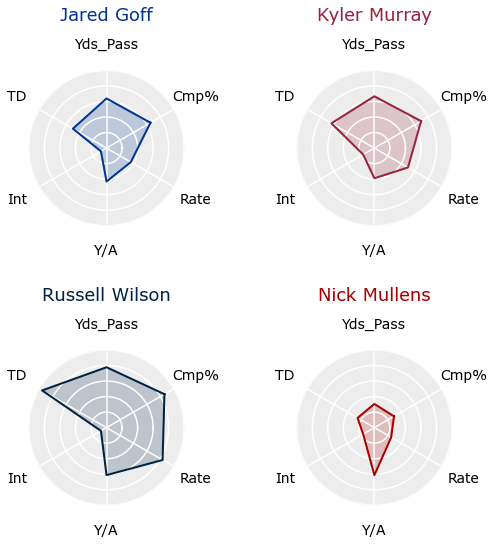

In [72]:
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data from NFC West  
sf_data = get_QB(df_1200, 'SFO')
sea_data = get_QB(df_1200, 'SEA')
ari_data = get_QB(df_1200, 'ARI')
lar_data = get_QB(df_1200, 'LAR')

# Plot QB data
ax1 = radar_chart(ax1, angle, lar_data, team_colors['LAR'])
ax2 = radar_chart(ax2, angle, ari_data, team_colors['ARI'])
ax3 = radar_chart(ax3, angle, sea_data, team_colors['SEA'])
ax4 = radar_chart(ax4, angle, sf_data, team_colors['SFO'])
plt.show()

## NFC East QB

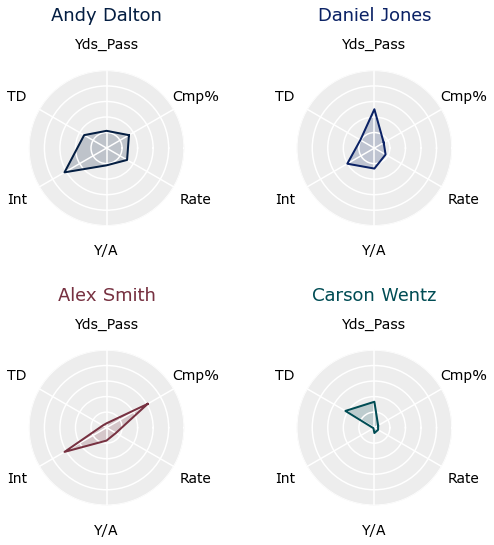

In [74]:
# NFC East
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
dal_data = get_QB(df_1200, 'DAL')
nyg_data = get_QB(df_1200, 'NYG')
was_data = get_QB(df_1200, 'WAS')
phi_data = get_QB(df_1200, 'PHI')

# Plot QB data
ax1 = radar_chart(ax1, angle, dal_data, team_colors['DAL'])
ax2 = radar_chart(ax2, angle, nyg_data, team_colors['NYG'])
ax3 = radar_chart(ax3, angle, was_data, team_colors['WAS'])
ax4 = radar_chart(ax4, angle, phi_data, team_colors['PHI'])

plt.show()

## NFC North QB

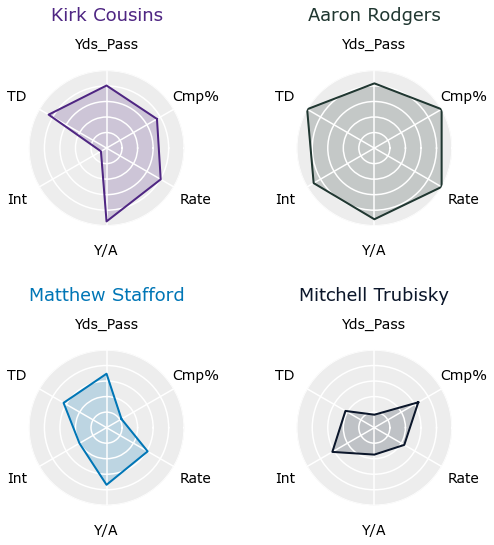

In [77]:
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
min_data = get_QB(df_1200, 'MIN')
gnb_data = get_QB(df_1200, 'GNB')
det_data = get_QB(df_1200, 'DET')
chi_data = get_QB(df_1200, 'CHI')

# Plot QB data
ax1 = radar_chart(ax1, angle, min_data, team_colors['MIN'])
ax2 = radar_chart(ax2, angle, gnb_data, team_colors['GNB'])
ax3 = radar_chart(ax3, angle, det_data, team_colors['DET'])
ax4 = radar_chart(ax4, angle, chi_data, team_colors['CHI'])

plt.show()

## NFC South QB